# Plot weekly sum of inmate positive cases across all PA SCI

In [49]:
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
from mizani.breaks import date_breaks
from mizani.formatters import date_format
from datetime import timedelta
from io import StringIO, BytesIO

import warnings
warnings.filterwarnings('ignore')


In [63]:
doc_df = pd.read_csv('../data/latest_data/PA_DOC_testing_data.csv', 
                     parse_dates=True,
                     index_col='date')

In [64]:
doc_df

,date.1,SCI,staff_positive,staff_negative,staff_pending,staff_death,staff_recovered,incarcerated_person_positive,incarcerated_person_negative,incarcerated_person_pending,...,test_transfer_positive_new,test_release_new,test_release_positive_new,test_hospital_new,test_hospital_positive_new,test_surveilance_new,test_surveilance_positive_new,test_symptomatic_new,test_symptomatic_positive_new,test_miscellaneous_new
date,,,,,,,,,,,,,,,,,,,,,
2020-04-07,2020-04-07,Rockview,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-07,2020-04-07,Albion,NaN,5.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-07,2020-04-07,Benner Township,NaN,4.0,1.0,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-07,2020-04-07,Cambridge Springs,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-07,2020-04-07,Camp Hill,2.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-03,2020-12-03,Retreat,4.0,10.0,1.0,NaN,4.0,13.0,1048.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2020-12-03,2020-12-03,Rockview,71.0,46.0,21.0,NaN,30.0,73.0,763.0,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2020-12-03,2020-12-03,Smithfield,73.0,133.0,20.0,NaN,51.0,63.0,510.0,158.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN


In [70]:
cases_by_week = doc_df.resample('7D')['incarcerated_person_positive_new'].sum().to_frame()

<AxesSubplot:xlabel='date'>

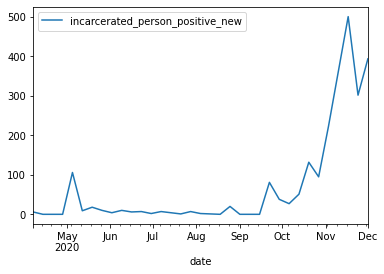

In [71]:
cases_by_week.plot()

## Create ggplot (plotnine) summary graph

In [72]:
from_week = cases_by_week.index.min().strftime('%d %b')
to_week = cases_by_week.index.max().strftime('%d %b')

In [73]:

ymax = int(round(cases_by_week.max()/100)*100)

ptitle = f'Weekly positive Covid19 cases in Pennsylvania prison\nfor weeks of {from_week} to {to_week}'



case_plot = (
    ggplot(cases_by_week) + 
    aes(x=cases_by_week.index, y='incarcerated_person_positive_new') + 
    geom_point(size=0, color='white') + 
    geom_smooth(se=False,method='loess',span=0.3, size=1.5, color='darkblue') +
    scale_x_datetime(breaks=date_breaks('1 months'), labels=date_format('%b')) + 
                    theme(panel_background = element_blank(), 
                          axis_title_y=element_text(size=10, color='darkblue'),
                          axis_text_y=element_line(color='darkblue'),
                          title=element_text(size=14),
                          axis_line_x=element_line(color='black', size=0.7),
                          axis_ticks_major_x=element_blank()
                         ) + 
                    ylim(0,ymax) +
                    ylab('Inmate Covid19 positive test result') + ggtitle(ptitle)
)

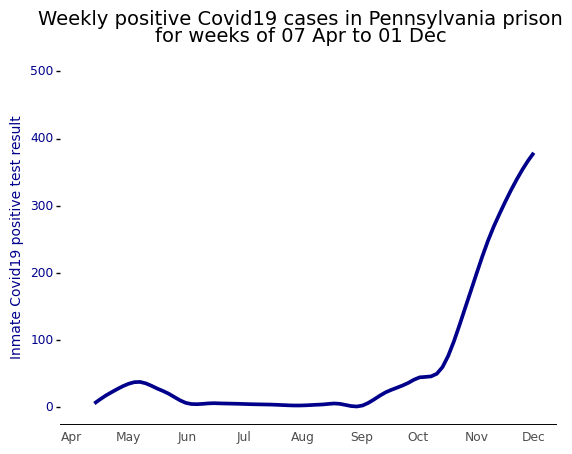

<ggplot: (-9223372036537809166)>

In [74]:
case_plot

In [57]:
case_plot.save('../img/Covid19_cases_in_PA_SCI.svg')

### Sparklines for SCI

In [58]:
def plot_SCI_sparkline(df, SCI, rolling_avg=None):
    '''plot a sparkline for an SCI
    
    
    '''
    daily_ts = doc_df[doc_df['SCI']==SCI].resample('D')['incarcerated_person_positive_new'].sum()
    
    if rolling_avg:
        daily_ts=daily_ts.rolling(rolling_avg).mean()
    
    start=daily_ts.index.min().strftime('%b %d')
    end=daily_ts.index.max().strftime('%b %d')
    
    xmax = daily_ts.idxmax()
    ymax = daily_ts.max()
    
    if rolling_avg:
        ymax_str = f'{ymax:0.1f}'
    else:
        ymax_str = str(round(ymax))

    
    fig,ax=plt.subplots(figsize=(4,0.4))
    sci_plot= daily_ts.plot(ax=ax)
    my_xticks = ax.get_xticks()
    
    #sci_plot.set_axis_off()
    sci_plot.set_frame_on(False)
    sci_plot.get_yaxis().set_visible(False)
    sci_plot.get_xaxis().set_visible(True)
    
    sci_plot.set_xticks([my_xticks[0], my_xticks[-1]])
    sci_plot.set_xticklabels([start, end])
    sci_plot.xaxis.set_ticks_position('none') 
    sci_plot.set_xlabel(SCI)
    sci_plot.annotate(ymax_str, (xmax,ymax), color='red')
    
    sci_plot.axes.set_xlim(right=daily_ts.index.max()+timedelta(days=2))
    
    return fig

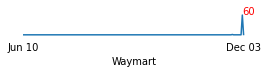

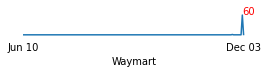

In [59]:
plot_SCI_sparkline(doc_df, 'Waymart', rolling_avg=None)

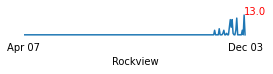

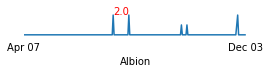

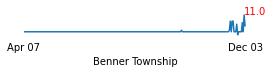

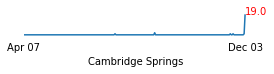

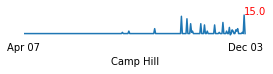

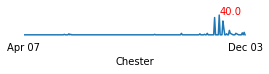

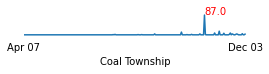

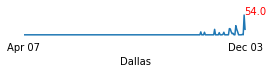

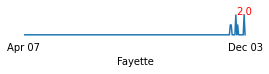

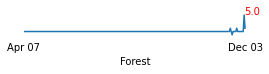

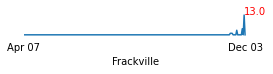

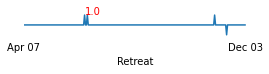

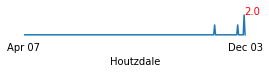

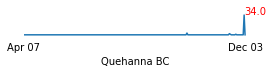

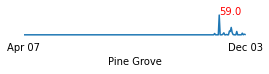

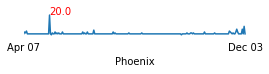

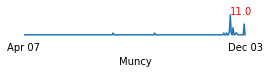

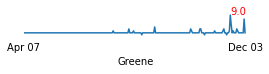

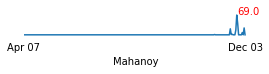

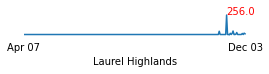

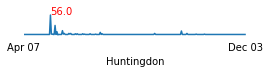

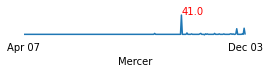

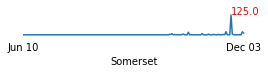

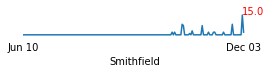

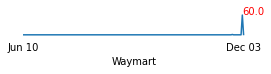

In [60]:
for SCI in doc_df['SCI'].unique():
    plot_SCI_sparkline(doc_df, SCI, rolling_avg='1D')

In [89]:
doc_df.loc['2020-12-02'][['SCI','incarcerated_person_positive_new']].sort_values('incarcerated_person_positive_new')

,SCI,incarcerated_person_positive_new
date,,
2020-12-02,Albion,0.0
2020-12-02,Retreat,0.0
2020-12-02,Coal Township,0.0
2020-12-02,Huntingdon,0.0
2020-12-02,Cambridge Springs,1.0
2020-12-02,Pine Grove,2.0
2020-12-02,Fayette,2.0
2020-12-02,Houtzdale,2.0
2020-12-02,Chester,5.0


<AxesSubplot:xlabel='date'>

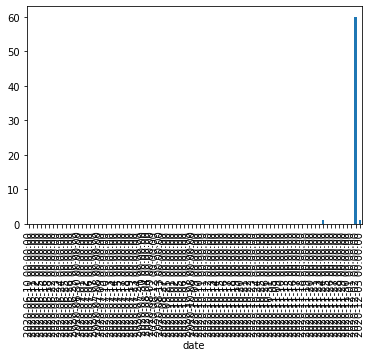

In [92]:
doc_df[doc_df['SCI']=='Waymart']['incarcerated_person_positive_new'].plot(kind='bar')